In [1]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#paths of files to load into dfs
mousepath = 'data/data_mouse_drug_data.csv'
trialpath = 'data/data_clinicaltrial_data.csv'

#import csv's into dfs
mouse = pd.read_csv(mousepath)
clinical = pd.read_csv(trialpath)


In [3]:
#combine dfs
trial = pd.merge(mouse, clinical, on='Mouse ID')
trial.head(1)

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.0,0


# Tumor Response to Treatment


In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame
#copy trial df into new variable 
response = trial

response = response.drop('Metastatic Sites', axis=1)

response = response.groupby(['Drug', 'Timepoint'], as_index=False).mean()
response = pd.DataFrame(response)
response.head(12)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [5]:
 # Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Convert to DataFrame

# Preview DataFrame

In [6]:
#clean df
response2 = response.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
response2

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


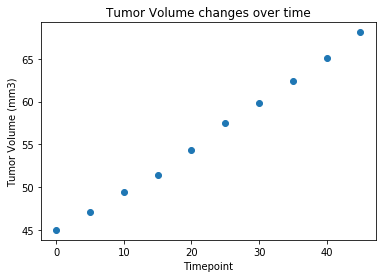

In [7]:

plt.scatter(response2.index, response2['Placebo'])
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.title('Tumor Volume changes over time')
plt.show()